In [147]:
from pandas_datareader import data as pdr
from datetime import date, datetime
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [148]:
ticket = "^BVSP"
begin = "2015-01-01"
end = "2024-03-07"

In [ ]:
df = pdr.get_data_yahoo(ticket, start=begin, end=end)

In [150]:
# Definindo medias que serão utilizada na estrategia

periodo = 55
df["Return"] = df["Adj Close"].pct_change()
df["smalow"] = df["Low"].rolling(3).mean()
df["smahigh"] = df["High"].rolling(3).mean()
df["sma"] = df["Adj Close"].rolling(periodo).mean()

df = df.dropna()

In [151]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,smalow,smahigh,sma
Date,,,,,,,,,,
2024-02-02,128471.00000,128878.000000,126628.000000,127182.000000,127182.000000,10982800,-0.010110,127079.333333,128972.333333,128763.254545
2024-02-05,127182.00000,127834.000000,126443.000000,127593.000000,127593.000000,9637200,0.003232,126785.000000,128397.666667,128840.800000
2024-02-06,127593.00000,130417.000000,127593.000000,130416.000000,130416.000000,13780300,0.022125,126888.000000,129043.000000,128946.981818
2024-02-07,130412.00000,130552.000000,129518.000000,129608.000000,129608.000000,15425400,-0.006196,127851.333333,129601.000000,129029.636364
2024-02-08,129949.78125,130125.921875,129103.476562,129136.976562,129136.976562,0,-0.003634,128738.158854,130364.973958,129084.945028


<Axes: xlabel='Date'>

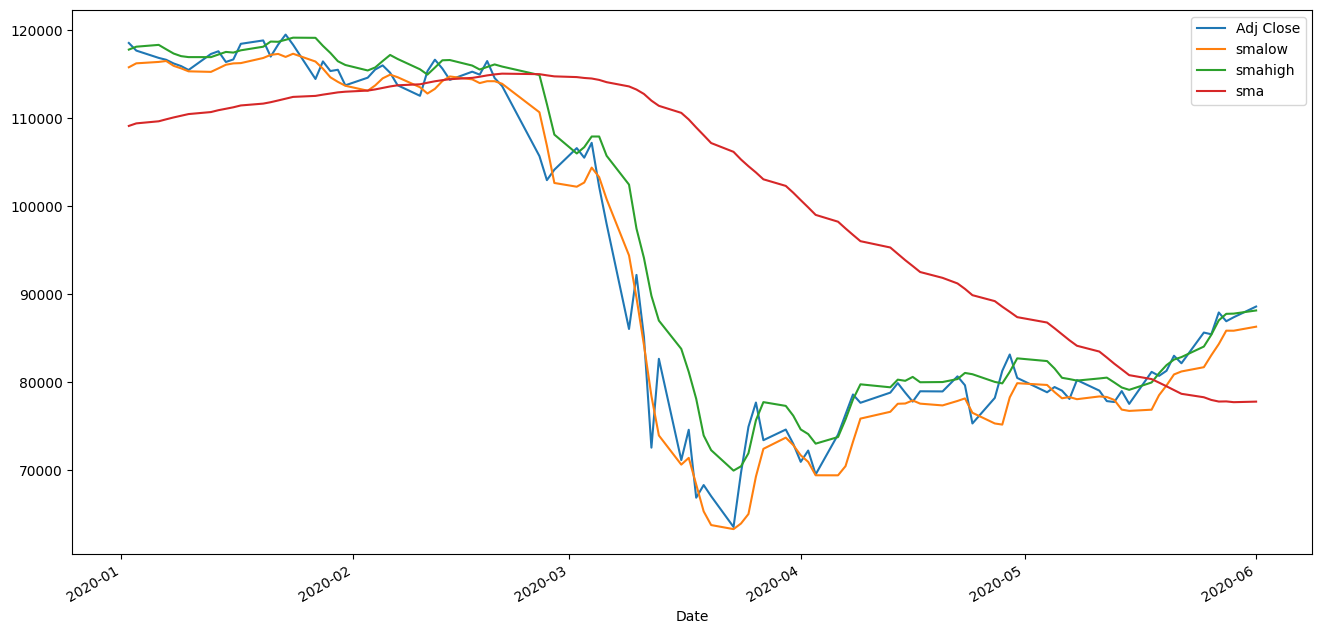

In [152]:
df.loc["2020-01-01":"2020-06-01", ["Adj Close", "smalow", "smahigh", "sma"]].plot(figsize=(16,8))

In [153]:
row_interator = df.iterrows()
profits = []
lot = 1

for date, row in row_interator:
    # Se o fechamento estiver abaixo da média simples da mínima de 3 periodos e a média de 30 periodos estiver apontada pra cima, entramos COMPRADOS
    if (row["Adj Close"] < row["smalow"]) and (row.shift(1)["sma"] > row.shift(2)["sma"]):
        
        if df.loc[date].shift(1)["sma"] < row["Close"]: break
        print("\nEntry ", date)
        entry_price = row["Adj Close"]
        # SAIMOS quando o fechameto for acima da media simples da máxima de 3 periodos
        while row["Adj Close"] < row["smahigh"]:
            try:
                date, row = next(row_interator)
                print(date, " posicionado")
            except StopIteration:
                break
        exit_price = row["Adj Close"]
        print("Exit", date)
        profit = (exit_price - entry_price) * 0.2 * lot
        print("Lucro: ", profit)
        profits.append(profit)


Entry  2015-03-26 00:00:00
2015-03-27 00:00:00  posicionado
2015-03-30 00:00:00  posicionado
Exit 2015-03-30 00:00:00
Lucro:  132.6

Entry  2015-04-17 00:00:00
2015-04-20 00:00:00  posicionado
2015-04-22 00:00:00  posicionado
2015-04-23 00:00:00  posicionado
Exit 2015-04-23 00:00:00
Lucro:  346.0

Entry  2015-05-13 00:00:00
2015-05-14 00:00:00  posicionado
2015-05-15 00:00:00  posicionado
Exit 2015-05-15 00:00:00
Lucro:  175.4

Entry  2015-05-19 00:00:00
2015-05-20 00:00:00  posicionado
2015-05-21 00:00:00  posicionado
2015-05-22 00:00:00  posicionado
2015-05-25 00:00:00  posicionado
2015-05-26 00:00:00  posicionado
2015-05-27 00:00:00  posicionado
2015-05-28 00:00:00  posicionado
2015-05-29 00:00:00  posicionado
2015-06-01 00:00:00  posicionado
2015-06-02 00:00:00  posicionado
Exit 2015-06-02 00:00:00
Lucro:  -252.60000000000002

Entry  2015-06-05 00:00:00
2015-06-08 00:00:00  posicionado
2015-06-09 00:00:00  posicionado
2015-06-10 00:00:00  posicionado
Exit 2015-06-10 00:00:00
Lucro

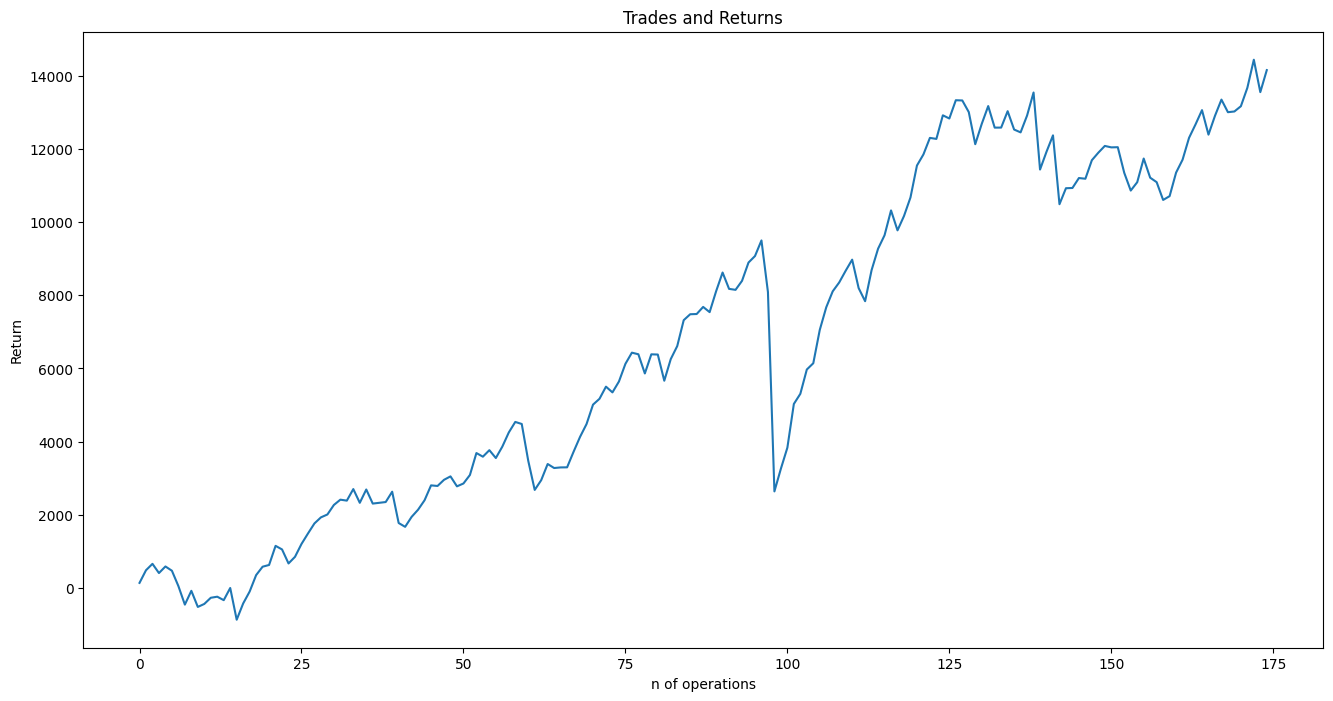

In [154]:
plt.figure(figsize=(16,8))
plt.plot(np.array(profits).cumsum())
plt.ylabel("Return")
plt.xlabel("n of operations")
plt.title("Trades and Returns")
plt.show()